In [91]:
%load_ext autoreload
%autoreload 2
from Code import plot_utils
from Code import array_analysis as ar
from Code import antenna as ant
import scipy.io
from os.path import dirname, join as pjoin
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import scipy.signal as sig

figures_path = "./Report/My_figures"
cmap = plt.get_cmap("tab10")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
c = 299792458 # m/s
f = 8e9
d = c/(2*f)
Nx = 12
Ny = 12
steering_angles = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
db_min = -50
db_max = 5

arr = ar.RectangularArray(Nx = Nx, Ny=Ny,f_0=f, dx=d, dy=d)
ctrl = ar.LinearPhaseController(arr)
antenna_elm = ant.Antenna('Code', 'ant_gain_pat.mat')

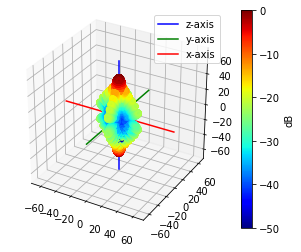

In [3]:
fig, ax = ctrl.array.plot_array_factor_3D(min_dB=db_min)
fig.savefig(figures_path + "/array_factor_3d", dpi=300, 
            transparent=False, facecolor="white", 
            bbox_inches="tight")

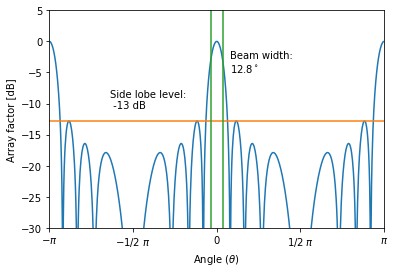

In [107]:
ctrl.array.W = np.ones((8,8))
fig, ax = ctrl.array.plot_array_factor_vertical(theta_null=0, phi_null=0, polar=False, annotate=False)
beam_info = ctrl.array.get_af_main_beam(theta_null=0, phi_null=0)

# House keeping
ax.set_ylim(-30, db_max)
ax.set_xlim(-np.pi, np.pi)
xticks = [np.pi*elm for elm in [-1, -0.5, 0, 0.5, 1]]
xticklabels = [f"$-\pi$", f"$-1/2~\pi$", f"0", f"$1/2~\pi$", f"$\pi$"]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"Angle $(\theta )$")

# Annotate side lobe level
side_lobe_level = ctrl.array.get_side_lobe_level(theta_null=0, phi_null=0)
side_lobe_line = 20*np.log10(side_lobe_level*beam_info['amplitude'])
ax.axhline(y=side_lobe_line, color=cmap(1))
ax.annotate(f"Side lobe level:\n {side_lobe_line:.0f} dB", (-2, side_lobe_line+2))

# Annotate beam width
width = beam_info["width"]
ax.axvline(x=-(beam_info["width"]/2), color=cmap(2))
ax.axvline(x=+(beam_info["width"]/2), color=cmap(2))
ax.annotate(f"Beam width:\n{width*360/(2*np.pi):.1f}" r"$^\circ$", (0.25, -5))

fig.savefig(figures_path + "/uniform_tapering_side_lobes", dpi=300, 
            transparent=False, facecolor="white", 
            bbox_inches="tight")

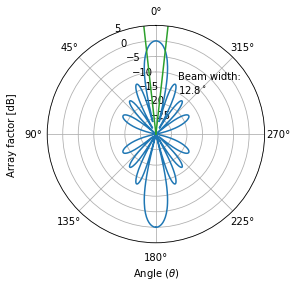

In [98]:
ctrl.array.W = np.ones((8,8))
fig, ax = ctrl.array.plot_array_factor_vertical(theta_null=0, phi_null=0, polar=True, annotate=False)
beam_info = ctrl.array.get_af_main_beam(theta_null=0, phi_null=0)

# House keeping
ax.set_ylim(-30, db_max)
#ax.set_xlim(-np.pi, np.pi)
#xticks = [np.pi*elm for elm in [-1, -0.5, 0, 0.5, 1]]
#xticklabels = [f"$-\pi$", f"$-1/2~\pi$", f"0", f"$1/2~\pi$", f"$\pi$"]
#ax.set_xticks(xticks)
#ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"Angle $(\theta )$")

# Annotate side lobe level
#side_lobe_level = ctrl.array.get_side_lobe_level(theta_null=0, phi_null=0)
#side_lobe_line = 20*np.log10(side_lobe_level*beam_info['amplitude'])
#ax.axhline(y=side_lobe_line, color=cmap(1))
#ax.annotate(f"Side lobe level:\n {side_lobe_line:.0f} dB", (-2, side_lobe_line+2))

# Annotate beam width
width = beam_info["width"]
ax.axvline(x=-(beam_info["width"]/2), color=cmap(2))
ax.axvline(x=+(beam_info["width"]/2), color=cmap(2))
ax.annotate(f"Beam width:\n{width*360/(2*np.pi):.1f}" r"$^\circ$", (-0.5, -15))

fig.savefig(figures_path + "/uniform_tapering_side_lobes_polar", dpi=300, 
            transparent=False, facecolor="white", 
            bbox_inches="tight")

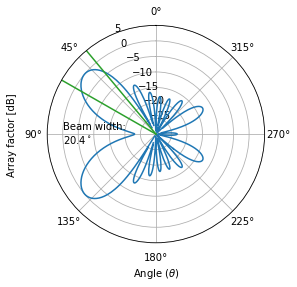

In [104]:
ctrl.array.W = np.ones((8,8))
steer = 2*np.pi*50/360
fig, ax = ctrl.array.plot_array_factor_vertical(theta_null=steer, phi_null=0, polar=True, annotate=False)
beam_info = ctrl.array.get_af_main_beam(theta_null=steer, phi_null=0)

# House keeping
ax.set_ylim(-30, db_max)
#ax.set_xlim(-np.pi, np.pi)
#xticks = [np.pi*elm for elm in [-1, -0.5, 0, 0.5, 1]]
#xticklabels = [f"$-\pi$", f"$-1/2~\pi$", f"0", f"$1/2~\pi$", f"$\pi$"]
#ax.set_xticks(xticks)
#ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"Angle $(\theta )$")

# Annotate side lobe level
#side_lobe_level = ctrl.array.get_side_lobe_level(theta_null=0, phi_null=0)
#side_lobe_line = 20*np.log10(side_lobe_level*beam_info['amplitude'])
#ax.axhline(y=side_lobe_line, color=cmap(1))
#ax.annotate(f"Side lobe level:\n {side_lobe_line:.0f} dB", (-2, side_lobe_line+2))

# Annotate beam width
width = beam_info["width"]
ax.axvline(x=steer-(beam_info["width"]/2), color=cmap(2))
ax.axvline(x=steer+(beam_info["width"]/2), color=cmap(2))
ax.annotate(f"Beam width:\n{width*360/(2*np.pi):.1f}" r"$^\circ$", (np.pi/2+0.1, 0))

fig.savefig(figures_path + "/uniform_tapering_side_lobes_polar_steered", dpi=300, 
            transparent=False, facecolor="white", 
            bbox_inches="tight")

[[   1    7   21   35   35   21    7    1]
 [   7   49  147  245  245  147   49    7]
 [  21  147  441  735  735  441  147   21]
 [  35  245  735 1225 1225  735  245   35]
 [  35  245  735 1225 1225  735  245   35]
 [  21  147  441  735  735  441  147   21]
 [   7   49  147  245  245  147   49    7]
 [   1    7   21   35   35   21    7    1]]


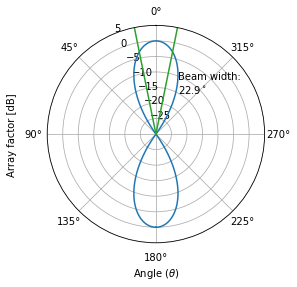

In [100]:
arr_bino = ar.RectangularArray(Nx = Nx, Ny=Ny,f_0=f, dx=d, dy=d)
ctrl_bino = ar.LinearPhaseController(arr_bino)

bino = np.array([1, 7, 21, 35, 35, 21, 7, 1],ndmin=2).T
bino_mat = np.matmul(bino, bino.T)
print(bino_mat)
ctrl_bino.array.W = bino_mat

fig, ax = ctrl_bino.array.plot_array_factor_vertical(theta_null=0, phi_null=0, polar=True, annotate=False)
beam_info = ctrl_bino.array.get_af_main_beam(theta_null=0, phi_null=0)

# House keeping
ax.set_ylim(-30, db_max)
#ax.set_xlim(-np.pi, np.pi)
# xticks = [np.pi*elm for elm in [-1, -0.5, 0, 0.5, 1]]
# xticklabels = [f"$-\pi$", f"$-1/2~\pi$", f"0", f"$1/2~\pi$", f"$\pi$"]
# ax.set_xticks(xticks)
# ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"Angle $(\theta )$")

# Annotate side lobe level (not needed for binomial)
# side_lobe_level = ctrl_bino.array.get_side_lobe_level(theta_null=0, phi_null=0)
# side_lobe_line = 20*np.log10(side_lobe_level*beam_info['amplitude'])
# ax.axhline(y=side_lobe_line, color=cmap(1))
# ax.annotate(f"Side lobe level:\n {side_lobe_line:.0f} dB", (-2, side_lobe_line+2))

# Annotate beam width
width = beam_info["width"]
ax.axvline(x=-(beam_info["width"]/2), color=cmap(2))
ax.axvline(x=+(beam_info["width"]/2), color=cmap(2))
ax.annotate(f"Beam width:\n{width*360/(2*np.pi):.1f}" r"$^\circ$", (-0.5, -15))

fig.savefig(figures_path + "/binomial_tapering_side_lobes", dpi=300, 
            transparent=False, facecolor="white", 
            bbox_inches="tight")

R_0 = 31.62278, z_0 = 1.18066
R_0 = 31.62278, z_0 = 1.18066
R_0 = 31.62278, z_0 = 1.18066


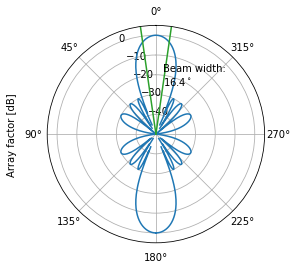

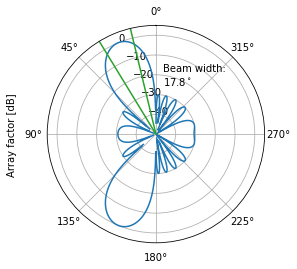

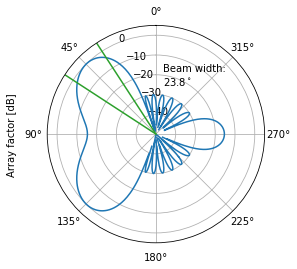

In [112]:
#fig = plt.figure()
ctrl.array.W = np.ones((8,8))
for n in range(3):
    angle = steering_angles[n]
    Nx = 8
    a = ar.dolph_tschebyscheff_1d_side_lobe_level(Nx, 30)
    ctrl.array.W = np.matmul(a.T, a)
    ctrl.set_steering_direction(angle, 0)
    fig, ax = ctrl.array.plot_array_factor_vertical(angle, 0, annotate=False)
    ax.set_ylim(db_min, db_max)
    #ax.figure=fig
    #fig.axes.append(ax)
    #fig.add_axes(ax)
    #dummy = fig.add_subplot(1, 3, n+1)
    #ax.set_position(dummy.get_position())
    #dummy.remove()

    beam_info = ctrl.array.get_af_main_beam(theta_null=angle, phi_null=0)
    width = beam_info["width"]
    ax.axvline(x=angle-(beam_info["width"]/2), color=cmap(2))
    ax.axvline(x=angle+(beam_info["width"]/2), color=cmap(2))
    ax.annotate(f"Beam width:\n{width*360/(2*np.pi):.1f}" r"$^\circ$", (-0.15, -25))

    fig.savefig(figures_path + f"/cheby_steering_{n}", dpi=300, 
            transparent=False, facecolor="white", 
            bbox_inches="tight")
#fig.show()

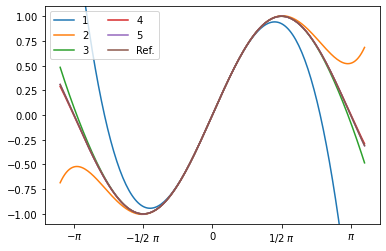

In [38]:
xticks = [np.pi*elm for elm in [-1, -0.5, 0, 0.5, 1]]
xticklabels = [f"$-\pi$", f"$-1/2~\pi$", f"0", f"$1/2~\pi$", f"$\pi$"]
thetas = np.linspace(-1.1*np.pi, 1.1*np.pi, 200)
fig, ax = plt.subplots()
for n in range(1,6):
    y = [ar.sin_taylor(x, n) for x in thetas]
    ax.plot(thetas, y, label=f"{n}")
ax.plot(thetas, np.sin(thetas), label='Ref.')
ax.set_ylim((-1.1, 1.1))
ax.legend(ncol=2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

fig.savefig(figures_path + f"/sin_taylor_approx", dpi=300, 
            transparent=False, facecolor="white", 
            bbox_inches="tight")


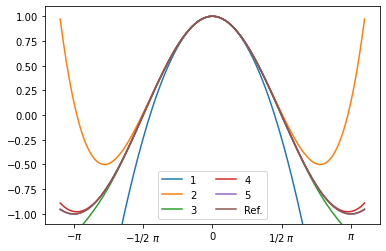

In [39]:
xticks = [np.pi*elm for elm in [-1, -0.5, 0, 0.5, 1]]
xticklabels = [f"$-\pi$", f"$-1/2~\pi$", f"0", f"$1/2~\pi$", f"$\pi$"]
thetas = np.linspace(-1.1*np.pi, 1.1*np.pi, 200)
fig, ax = plt.subplots()
for n in range(1,6):
    y = [ar.cos_taylor(x, n) for x in thetas]
    ax.plot(thetas, y, label=f"{n}")
ax.plot(thetas, np.cos(thetas), label='Ref.')
ax.set_ylim((-1.1,1.1))
ax.legend(ncol=2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

fig.savefig(figures_path + f"/cos_taylor_approx", dpi=300, 
            transparent=False, facecolor="white", 
            bbox_inches="tight")